# Machine Learning

## Mounting Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Linear Regression

In [ ]:
# load dataset
admit = pd.read_csv('/content/drive/MyDrive/DQlab/Tetris/Sesi 4 - Machine Learning/regression_data.csv')
admit.head()

,gre_score,toefl_score,univ_ranking,motiv_letter_strength,recommendation_strength,gpa,research_exp,admit_prob
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [ ]:
# split train test
from sklearn.model_selection import train_test_split

feature = admit.drop(columns='admit_prob')
target = admit[['admit_prob']]

feature_admit_train, feature_admit_test, target_admit_train, target_admit_test = train_test_split(feature, target, test_size=0.20, random_state=42)

In [ ]:
# convert data into numpy arrays
X_admit_train = feature_admit_train.to_numpy()
y_admit_train = target_admit_train.to_numpy().ravel()

In [ ]:
from sklearn.linear_model import LinearRegression

# define the model
linreg = LinearRegression()

# train the model
linreg.fit(X_admit_train, y_admit_train)

LinearRegression()

In [ ]:
# retrieve the coefficients
# show as a nice dataframe

data = feature_admit_train
model = linreg

coef_df = pd.DataFrame({
    'feature':['intercept'] + data.columns.tolist(),
    'coefficient':[model.intercept_] + list(model.coef_)
})

coef_df

,feature,coefficient
0,intercept,-1.421447
1,gre_score,0.002434
2,toefl_score,0.002996
3,univ_ranking,0.002569
4,motiv_letter_strength,0.001814
5,recommendation_strength,0.017238
6,gpa,0.112527
7,research_exp,0.024027


In [ ]:
# model evaluation on training data
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

# create prediction vector on training data
y_predict_train = linreg.predict(X_admit_train)

print('MAE for traning_data is {}'.format(mean_absolute_error(y_admit_train, y_predict_train)))
print('MAPE for traning_data is {}'.format(mean_absolute_percentage_error(y_admit_train, y_predict_train)))

MAE for traning_data is 0.04253334061164317
MAPE for traning_data is 0.06848166838244786


In [ ]:
# prepare prediction result on test data
X_admit_test = feature_admit_test.to_numpy()
y_admit_test = target_admit_test.to_numpy().ravel()


In [ ]:
# model evaluation on test data

# create prediction vector on training data
y_predict_test = linreg.predict(X_admit_test)

print('MAE for test data is {}'.format(mean_absolute_error(y_admit_test, y_predict_test)))
print('MAPE for test data is {}'.format(mean_absolute_percentage_error(y_admit_test, y_predict_test)))

MAE for test data is 0.042722654277053636
MAPE for test data is 0.06857756648317814


## Decision Tree

In [ ]:
# load dataset
purchase = pd.read_csv('/content/drive/MyDrive/DQlab/Tetris/Sesi 4 - Machine Learning/classification_data.csv')
purchase.head()

,age,salary,purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [ ]:
# split data
from sklearn.model_selection import train_test_split

feature = purchase.drop(columns='purchased')
target = purchase[['purchased']]

feature_purchase_train, feature_purchase_test, target_purchase_train, target_purchase_test = train_test_split(feature, target, test_size=0.20, random_state=42)

In [ ]:
# convert data into numpy arrays
X_purchase_train = feature_purchase_train.to_numpy()
y_purchase_train = target_purchase_train.to_numpy().ravel()

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# define the model
dectree = DecisionTreeClassifier()

# train the model
dectree.fit(X_purchase_train, y_purchase_train)

DecisionTreeClassifier()

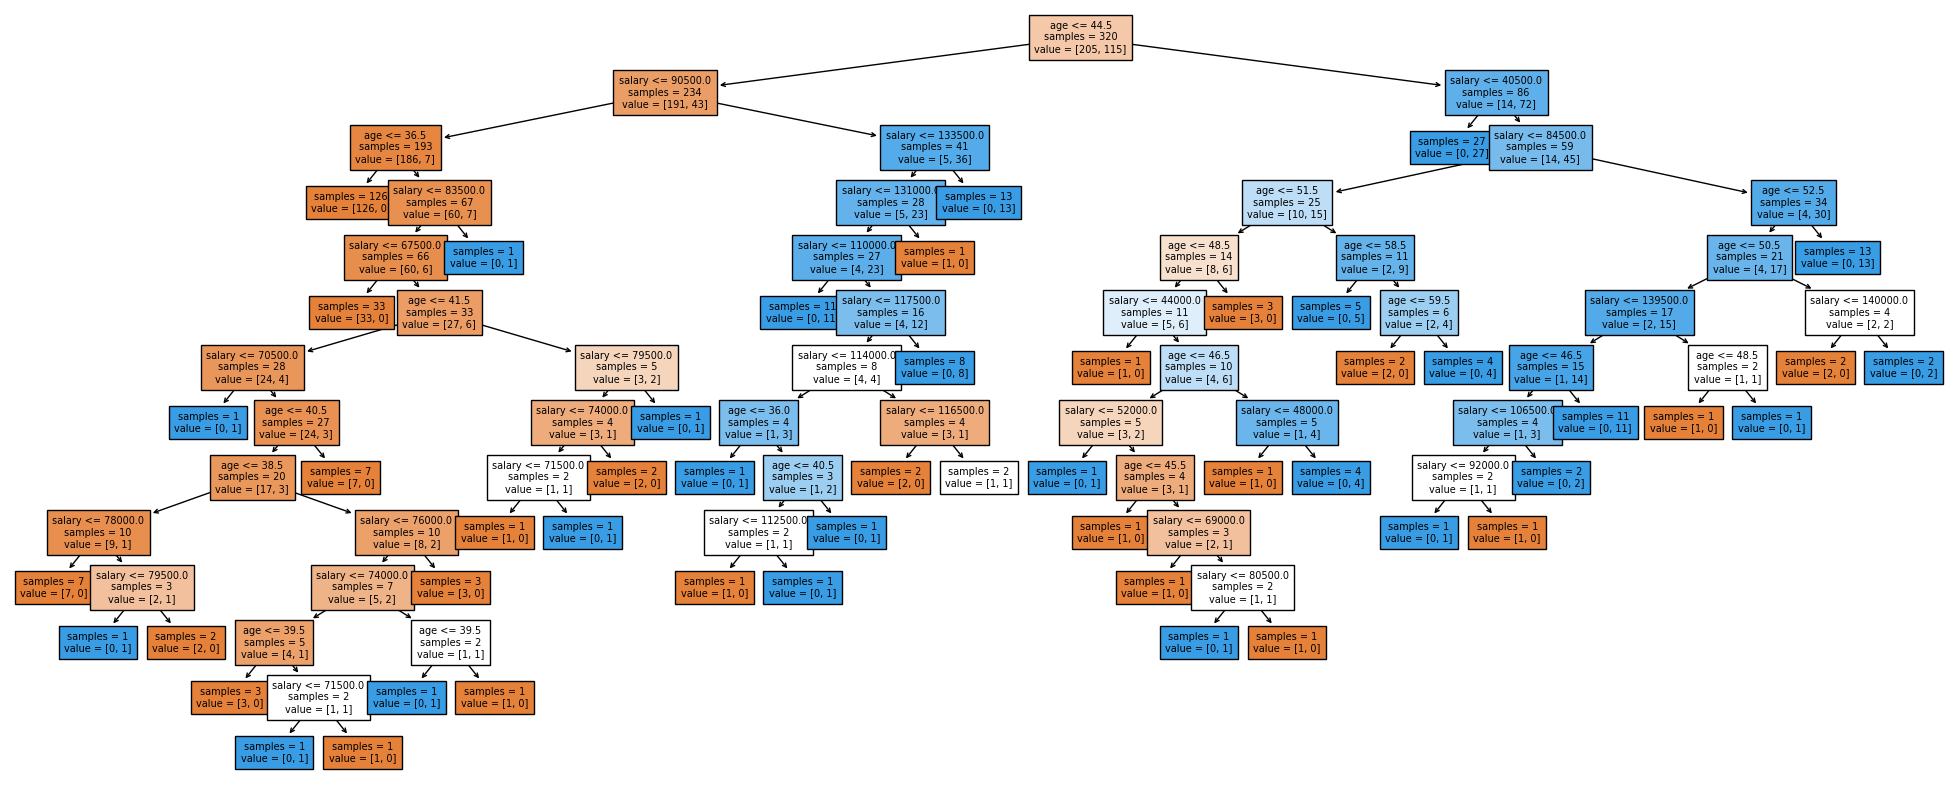

In [ ]:
from sklearn.tree import plot_tree
plt.figure(figsize=(25, 10))
plot_tree(
    dectree,
    feature_names=['age',"salary"],
    impurity=False,
    filled=True,
    fontsize=7
)
plt.show()

In [ ]:
# accuracy score on training data
from sklearn.metrics import accuracy_score

y_predict_train = dectree.predict(X_purchase_train)

print(f"Accuracy on training data is {accuracy_score(y_purchase_train,y_predict_train)}")

Accuracy on training data is 0.996875


In [ ]:
# prepare test data as numpy arrays

X_purchase_test = feature_purchase_test.to_numpy()
y_purchase_test = target_purchase_test.to_numpy().ravel()

In [ ]:
# accuracy score on test data
y_predict_test = dectree.predict(X_purchase_test)

print(f"Accuracy on test data is {accuracy_score(y_purchase_test,y_predict_test)}")

Accuracy on test data is 0.8375


## Clustering

In [ ]:
 # load dataset
status = pd.read_csv('/content/drive/MyDrive/DQlab/Tetris/Sesi 4 - Machine Learning/clustering_data.csv')
status.head()

,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,0,0,150,0,0,0,0,0
1,0,0,111,0,0,0,0,0
2,0,0,204,9,0,0,0,0
3,6,0,211,5,1,0,0,0
4,1,0,198,5,0,0,0,0


In [ ]:
# convert data to numpy
X = status.to_numpy()

In [ ]:
# train K-means clustering
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2)
kmeans.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2)

In [ ]:
# clusters' centroid analysis
# derive average of each feature (column)
status['cluster'] = kmeans.labels_
status = status.reset_index()
centroid_df = status.groupby('cluster')[['num_comments', 'num_shares', 'num_likes',
       'num_loves', 'num_wows', 'num_hahas', 'num_sads', 'num_angrys','index']].agg({'num_comments': 'mean', 'num_shares':'mean',
                                                                             'num_likes':'mean',
                                                                             'num_loves': 'mean', 'num_wows': 'mean', 'num_hahas':'mean',
                                                                             'num_sads': 'mean', 'num_angrys': 'mean','index':'count'}).reset_index()
centroid_df = centroid_df.rename(columns = {'index':'num_status'})
centroid_df['cluster'] = ['cluster 1', 'cluster 2']
centroid_df

,cluster,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,num_status
0,cluster 1,13.778431,1.801961,89.724265,1.285049,0.569363,0.185294,0.147059,0.047794,4080
1,cluster 2,59.442308,17.302885,1925.610577,4.586538,2.947115,0.298077,0.052885,0.004808,208


# Selesai